### Name : Ahbaz Memon
### Roll : PB11
### ERP : 1032180046
### Sub : DWDM
### Ex : Lab Assignment 01

# Header files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets
from sklearn import decomposition
from sklearn import ensemble
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# Loading

In [2]:
car=pd.read_csv('Car_Uncleaned.csv')

## identifying cleaning part and performing some operations

In [3]:
car.head()

,Unnamed: 0,Unnamed: 1,model,year,price,transmission,mileage,fuel type,engine size,reference
0,NaN,NaN,C Class,2020.0,"£30,495",Automatic,NaN,Hybrid,2,/ad/25017331
1,NaN,NaN,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,/ad/25043746
2,NaN,NaN,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,/ad/25142894
3,as,as,C Class,2019.0,"£30,399",Automatic,NaN,Hybrid,2,/ad/24942816
4,NaN,NaN,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,/ad/24913660


In [4]:
car.head(10)

,Unnamed: 0,Unnamed: 1,model,year,price,transmission,mileage,fuel type,engine size,reference
0,NaN,NaN,C Class,2020.0,"£30,495",Automatic,NaN,Hybrid,2,/ad/25017331
1,NaN,NaN,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,/ad/25043746
2,NaN,NaN,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,/ad/25142894
3,as,as,C Class,2019.0,"£30,399",Automatic,NaN,Hybrid,2,/ad/24942816
4,NaN,NaN,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,/ad/24913660
5,NaN,NaN,C Class,2020.0,"£30,999",Automatic,NaN,Hybrid,2,/ad/25059312
6,NaN,NaN,C Class,2020.0,"£35,999",Automatic,NaN,Diesel,2,/ad/25418851
7,NaN,NaN,C Class,2019.0,"£37,990",Automatic,NaN,Petrol,3,/ad/25449314
8,NaN,NaN,C Class,2019.0,"£28,990",Automatic,NaN,Hybrid,2,/ad/25046820
9,NaN,NaN,C Class,2019.0,"£28,990",Automatic,NaN,Hybrid,2,/ad/25046821


In [5]:
car.tail()

,Unnamed: 0,Unnamed: 1,model,year,price,transmission,mileage,fuel type,engine size,reference
4001,NaN,NaN,C Class,2017.0,"£14,700",Manual,"31,357",Diesel,£150,/ad/25451436
4002,NaN,NaN,C Class,2018.0,"£18,500",Automatic,"28,248",Hybrid,£150,/ad/25451481
4003,NaN,NaN,C Class,2014.0,"£11,900",Manual,"48,055",Petrol,£20,/ad/25057204
4004,NaN,NaN,C Class,2014.0,"£11,300",Automatic,"49,865",Diesel,£145,/ad/25144481
4005,NaN,NaN,C Class,2014.0,"£14,800",Automatic,"55,445",Hybrid,£30,/ad/25154247


In [6]:
car.size

40060

In [7]:
car.ndim

2

In [8]:
car.shape

(4006, 10)

In [9]:
car.dtypes

Unnamed: 0       object
Unnamed: 1       object
model            object
year            float64
price            object
transmission     object
mileage          object
fuel type        object
engine size      object
reference        object
dtype: object

In [10]:
car.describe()

,year
count,3904.000000
mean,2017.341189
std,2.213643
min,1991.000000
25%,2016.000000
50%,2018.000000
75%,2019.000000
max,2020.000000


In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1 non-null      object 
 1   Unnamed: 1    1 non-null      object 
 2   model         3907 non-null   object 
 3   year          3904 non-null   float64
 4   price         3907 non-null   object 
 5   transmission  3907 non-null   object 
 6   mileage       3808 non-null   object 
 7   fuel type     4006 non-null   object 
 8   engine size   3842 non-null   object 
 9   reference     3907 non-null   object 
dtypes: float64(1), object(9)
memory usage: 313.1+ KB


In [12]:
car.isnull().sum()

Unnamed: 0      4005
Unnamed: 1      4005
model             99
year             102
price             99
transmission      99
mileage          198
fuel type          0
engine size      164
reference         99
dtype: int64

# Cleaning starts...

### working on 'unamed' columns

In [13]:
car.drop(columns=['Unnamed: 0','Unnamed: 1'],axis=1,inplace=True)

In [14]:
car.head()

,model,year,price,transmission,mileage,fuel type,engine size,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Hybrid,2,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Hybrid,2,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,/ad/24913660


### working on 'model' columns

In [15]:
car['model'].value_counts()

 C Class    3907
Name: model, dtype: int64

In [16]:
#as only one type of data is present we can delete column
car.drop(columns=['model'],axis=1,inplace=True)

In [17]:
car.head()

,year,price,transmission,mileage,fuel type,engine size,reference
0,2020.0,"£30,495",Automatic,NaN,Hybrid,2,/ad/25017331
1,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,/ad/25043746
2,2020.0,"£37,899",Automatic,NaN,Diesel,2,/ad/25142894
3,2019.0,"£30,399",Automatic,NaN,Hybrid,2,/ad/24942816
4,2019.0,"£29,899",Automatic,NaN,Diesel,2,/ad/24913660


### working for 'year' column

In [18]:
car['year'].dtypes

dtype('float64')

In [19]:
car['year'].size

4006

In [20]:
car.dropna(subset=['year'],inplace=True)

In [21]:
car['year'].size

3904

In [22]:
car['year']=car.year.astype(int)

In [23]:
car.head()

,year,price,transmission,mileage,fuel type,engine size,reference
0,2020,"£30,495",Automatic,NaN,Hybrid,2,/ad/25017331
1,2020,"£29,989",Automatic,NaN,Petrol,1.5,/ad/25043746
2,2020,"£37,899",Automatic,NaN,Diesel,2,/ad/25142894
3,2019,"£30,399",Automatic,NaN,Hybrid,2,/ad/24942816
4,2019,"£29,899",Automatic,NaN,Diesel,2,/ad/24913660


In [24]:
car['year'].dtype

dtype('int32')

In [25]:
car['year'].value_counts()

2019    1590
2017     666
2016     545
2018     362
2015     321
2014     136
2020     130
2013      64
2012      26
2011      13
2010      10
2008       8
2007       7
2009       7
2005       5
2002       4
2006       3
2004       3
2003       1
1995       1
1991       1
1998       1
Name: year, dtype: int64

### working on 'price' column

In [26]:
car.head()

,year,price,transmission,mileage,fuel type,engine size,reference
0,2020,"£30,495",Automatic,NaN,Hybrid,2,/ad/25017331
1,2020,"£29,989",Automatic,NaN,Petrol,1.5,/ad/25043746
2,2020,"£37,899",Automatic,NaN,Diesel,2,/ad/25142894
3,2019,"£30,399",Automatic,NaN,Hybrid,2,/ad/24942816
4,2019,"£29,899",Automatic,NaN,Diesel,2,/ad/24913660


In [27]:
car['price'].dtype

dtype('O')

In [28]:
def clean_car_price(p):
    s=''
    for e in p:
        if e.isdigit():
            s=s+e
    return float(str(s))

In [29]:
car['price']=car.price.apply(func=clean_car_price)

In [30]:
car.head()

,year,price,transmission,mileage,fuel type,engine size,reference
0,2020,30495.0,Automatic,NaN,Hybrid,2,/ad/25017331
1,2020,29989.0,Automatic,NaN,Petrol,1.5,/ad/25043746
2,2020,37899.0,Automatic,NaN,Diesel,2,/ad/25142894
3,2019,30399.0,Automatic,NaN,Hybrid,2,/ad/24942816
4,2019,29899.0,Automatic,NaN,Diesel,2,/ad/24913660


In [31]:
car['price'].dtype

dtype('float64')

### working on 'transmission' column

In [32]:
car.transmission.dtype

dtype('O')

In [33]:
car.transmission.value_counts()

Semi-Auto    2071
Automatic    1633
Manual        199
Other           1
Name: transmission, dtype: int64

In [34]:
# its look like this column is fine

### working on 'mileage' column

In [35]:
car.mileage.dtype

dtype('O')

In [36]:
car.mileage.isnull().sum()

97

In [37]:
car['mileage'].fillna('0',inplace=True)

In [38]:
car.head()

,year,price,transmission,mileage,fuel type,engine size,reference
0,2020,30495.0,Automatic,0,Hybrid,2,/ad/25017331
1,2020,29989.0,Automatic,0,Petrol,1.5,/ad/25043746
2,2020,37899.0,Automatic,0,Diesel,2,/ad/25142894
3,2019,30399.0,Automatic,0,Hybrid,2,/ad/24942816
4,2019,29899.0,Automatic,0,Diesel,2,/ad/24913660


In [39]:
def clean_car_mileage(m):
    s=''
    for e in m:
        if e.isdigit():
            s=s+e
    if s=='':
        s=0
    return float(str(s))

In [40]:
car['mileage']=car['mileage'].apply(func=clean_car_mileage)

In [41]:
mileage_median=car['mileage'].median()

In [42]:
car['mileage']=car.mileage.replace(0.0,mileage_median)

In [43]:
car.head()

,year,price,transmission,mileage,fuel type,engine size,reference
0,2020,30495.0,Automatic,14137.0,Hybrid,2,/ad/25017331
1,2020,29989.0,Automatic,14137.0,Petrol,1.5,/ad/25043746
2,2020,37899.0,Automatic,14137.0,Diesel,2,/ad/25142894
3,2019,30399.0,Automatic,14137.0,Hybrid,2,/ad/24942816
4,2019,29899.0,Automatic,14137.0,Diesel,2,/ad/24913660


In [44]:
car['mileage'].dtype

dtype('float64')

### working on 'fuel type' column

In [45]:
car['fuel type'].dtype

dtype('O')

In [46]:
car['fuel type'].value_counts()

Petrol    1324
Hybrid    1293
Diesel    1287
Name: fuel type, dtype: int64

In [47]:
# its look like this column is fine

### working on 'engine size' column

In [48]:
car['engine size'].dtype

dtype('O')

In [49]:
def clean_car_engine_size(ez):
    s=''
    if ez!=np.nan:
        for e in str(ez):
            if e.isdigit():
                s=s+e
        return s   

In [50]:
car['engine size']=car['engine size'].apply(func=clean_car_engine_size)

In [51]:
car.head()

,year,price,transmission,mileage,fuel type,engine size,reference
0,2020,30495.0,Automatic,14137.0,Hybrid,2,/ad/25017331
1,2020,29989.0,Automatic,14137.0,Petrol,15,/ad/25043746
2,2020,37899.0,Automatic,14137.0,Diesel,2,/ad/25142894
3,2019,30399.0,Automatic,14137.0,Hybrid,2,/ad/24942816
4,2019,29899.0,Automatic,14137.0,Diesel,2,/ad/24913660


In [52]:
car['engine size']=car['engine size'].replace(to_replace='',value='0').astype(int)

In [53]:
(car['engine size']==0).sum()

184

In [54]:
car['engine size']=car['engine size'].replace(to_replace=0,value=car['engine size'].mean())

In [55]:
car.head()

,year,price,transmission,mileage,fuel type,engine size,reference
0,2020,30495.0,Automatic,14137.0,Hybrid,2.0,/ad/25017331
1,2020,29989.0,Automatic,14137.0,Petrol,15.0,/ad/25043746
2,2020,37899.0,Automatic,14137.0,Diesel,2.0,/ad/25142894
3,2019,30399.0,Automatic,14137.0,Hybrid,2.0,/ad/24942816
4,2019,29899.0,Automatic,14137.0,Diesel,2.0,/ad/24913660


### working on 'reference' column

In [56]:
car.dropna(subset=['reference'],inplace=True)

In [57]:
def clean_car_reference(ref):
    s=''
    for e in ref:
        if e.isdigit():
            s=s+e
    return str(s)       

In [58]:
car['reference']=car.reference.apply(func=clean_car_reference)

In [59]:
car.head()

,year,price,transmission,mileage,fuel type,engine size,reference
0,2020,30495.0,Automatic,14137.0,Hybrid,2.0,25017331
1,2020,29989.0,Automatic,14137.0,Petrol,15.0,25043746
2,2020,37899.0,Automatic,14137.0,Diesel,2.0,25142894
3,2019,30399.0,Automatic,14137.0,Hybrid,2.0,24942816
4,2019,29899.0,Automatic,14137.0,Diesel,2.0,24913660


In [60]:
car.reset_index(inplace=True)

# After cleaning

In [61]:
car.head(10)

,index,year,price,transmission,mileage,fuel type,engine size,reference
0,0,2020,30495.0,Automatic,14137.0,Hybrid,2.0,25017331
1,1,2020,29989.0,Automatic,14137.0,Petrol,15.0,25043746
2,2,2020,37899.0,Automatic,14137.0,Diesel,2.0,25142894
3,3,2019,30399.0,Automatic,14137.0,Hybrid,2.0,24942816
4,4,2019,29899.0,Automatic,14137.0,Diesel,2.0,24913660
5,5,2020,30999.0,Automatic,14137.0,Hybrid,2.0,25059312
6,6,2020,35999.0,Automatic,14137.0,Diesel,2.0,25418851
7,7,2019,37990.0,Automatic,14137.0,Petrol,3.0,25449314
8,8,2019,28990.0,Automatic,14137.0,Hybrid,2.0,25046820
9,9,2019,28990.0,Automatic,14137.0,Hybrid,2.0,25046821


In [62]:
car.info()
# all count is equal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         3904 non-null   int64  
 1   year          3904 non-null   int32  
 2   price         3904 non-null   float64
 3   transmission  3904 non-null   object 
 4   mileage       3904 non-null   float64
 5   fuel type     3904 non-null   object 
 6   engine size   3904 non-null   float64
 7   reference     3904 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 228.9+ KB


In [63]:
car.isnull().sum()
#no nan

index           0
year            0
price           0
transmission    0
mileage         0
fuel type       0
engine size     0
reference       0
dtype: int64

In [64]:
car.describe()

,index,year,price,mileage,engine size
count,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000
mean,2037.601691,2017.341189,23689.205943,21921.892418,141.508348
std,1133.884606,2.213643,8968.716673,22323.351760,232.689737
min,0.000000,1991.000000,1290.000000,1.000000,2.000000
25%,1059.750000,2016.000000,17693.750000,6066.250000,125.000000
50%,2035.500000,2018.000000,22980.000000,14139.000000,145.000000
75%,3013.250000,2019.000000,28901.000000,31128.750000,145.000000
max,4005.000000,2020.000000,88995.000000,173000.000000,5400.000000


# normaliztion 

In [65]:
car2=car.copy()

In [66]:
car2.head()

,index,year,price,transmission,mileage,fuel type,engine size,reference
0,0,2020,30495.0,Automatic,14137.0,Hybrid,2.0,25017331
1,1,2020,29989.0,Automatic,14137.0,Petrol,15.0,25043746
2,2,2020,37899.0,Automatic,14137.0,Diesel,2.0,25142894
3,3,2019,30399.0,Automatic,14137.0,Hybrid,2.0,24942816
4,4,2019,29899.0,Automatic,14137.0,Diesel,2.0,24913660


In [67]:
def z_score_norm(x):
    return (x-x.mean())/x.std()

In [68]:
def min_max_norm(x,new_min,new_max):
    min_max=(((x-x.min())/(x.max()-x.min()))*(new_max-new_min))+(new_min)
    return min_max

In [69]:
def dec_scal_norm(x):
    j=len(str(x.max()))
    dec_scal=x/(10**j)
    return dec_scal

In [70]:
car2['price']=dec_scal_norm(np.array(car2.price.to_list()))

In [71]:
car2.head()

,index,year,price,transmission,mileage,fuel type,engine size,reference
0,0,2020,0.003050,Automatic,14137.0,Hybrid,2.0,25017331
1,1,2020,0.002999,Automatic,14137.0,Petrol,15.0,25043746
2,2,2020,0.003790,Automatic,14137.0,Diesel,2.0,25142894
3,3,2019,0.003040,Automatic,14137.0,Hybrid,2.0,24942816
4,4,2019,0.002990,Automatic,14137.0,Diesel,2.0,24913660


In [72]:
car2['mileage']=min_max_norm(np.array(car2.mileage.to_list()),0,1)

In [73]:
car2.head()

,index,year,price,transmission,mileage,fuel type,engine size,reference
0,0,2020,0.003050,Automatic,0.081711,Hybrid,2.0,25017331
1,1,2020,0.002999,Automatic,0.081711,Petrol,15.0,25043746
2,2,2020,0.003790,Automatic,0.081711,Diesel,2.0,25142894
3,3,2019,0.003040,Automatic,0.081711,Hybrid,2.0,24942816
4,4,2019,0.002990,Automatic,0.081711,Diesel,2.0,24913660


In [74]:
car2['engine size']=z_score_norm(np.array(car2['engine size'].to_list()))

In [75]:
car2.head()

,index,year,price,transmission,mileage,fuel type,engine size,reference
0,0,2020,0.003050,Automatic,0.081711,Hybrid,-0.599623,25017331
1,1,2020,0.002999,Automatic,0.081711,Petrol,-0.543748,25043746
2,2,2020,0.003790,Automatic,0.081711,Diesel,-0.599623,25142894
3,3,2019,0.003040,Automatic,0.081711,Hybrid,-0.599623,24942816
4,4,2019,0.002990,Automatic,0.081711,Diesel,-0.599623,24913660


# Visualization

In [76]:
plt.style.use('fivethirtyeight')

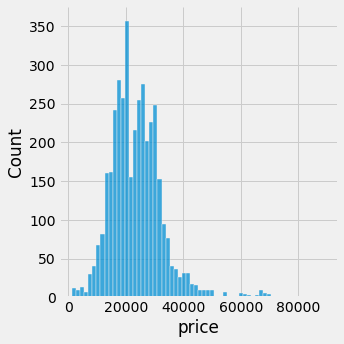

In [77]:
sns.displot(car['price'])

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

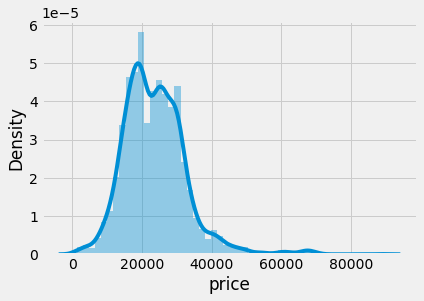

In [78]:
sns.distplot(car['price'])

<AxesSubplot:xlabel='transmission', ylabel='price'>

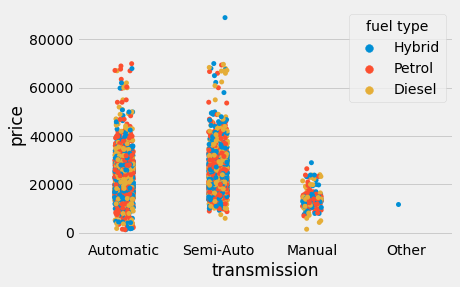

In [79]:
sns.stripplot(x='transmission',
            y='price',
            data=car,
            hue='fuel type'
           )

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='transmission', ylabel='price'>

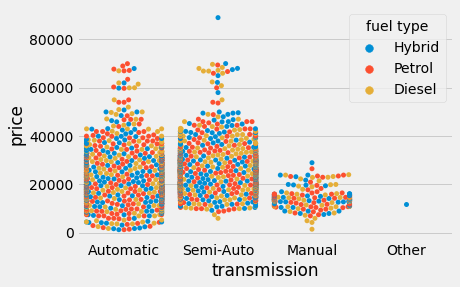

In [80]:
sns.swarmplot(x='transmission',
            y='price',
            data=car,
            hue='fuel type'
           )

<AxesSubplot:xlabel='year', ylabel='price'>

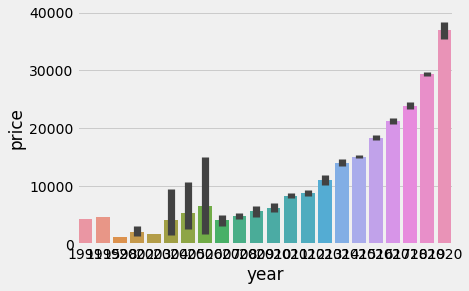

In [81]:
sns.barplot(x='year',
            y='price',
            data=car,
           )

<AxesSubplot:xlabel='transmission', ylabel='price'>

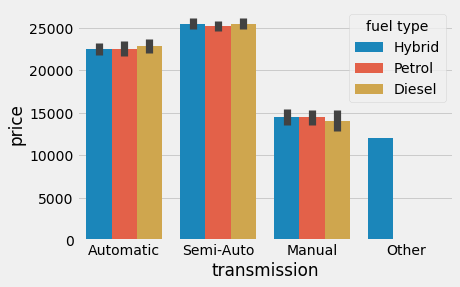

In [82]:
sns.barplot(x='transmission',
            y='price',
            data=car,
            hue='fuel type'
           )

In [83]:
pivot_price=car.pivot_table(index='year',columns=['transmission','fuel type'],values='price')
pivot_mileage=car.pivot_table(index='year',columns=['transmission','fuel type'],values='mileage')
pivot_engine=car.pivot_table(index='year',columns=['transmission','fuel type'],values='engine size')

<AxesSubplot:xlabel='transmission-fuel type', ylabel='year'>

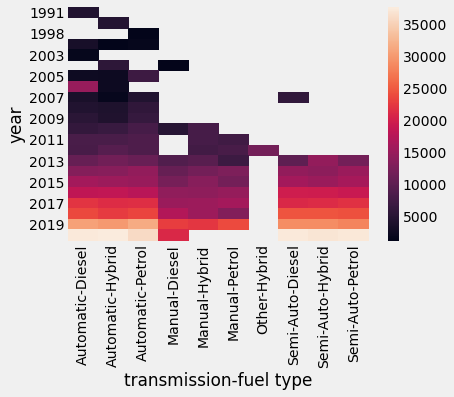

In [84]:
sns.heatmap(pivot_price)

<AxesSubplot:xlabel='transmission-fuel type', ylabel='year'>

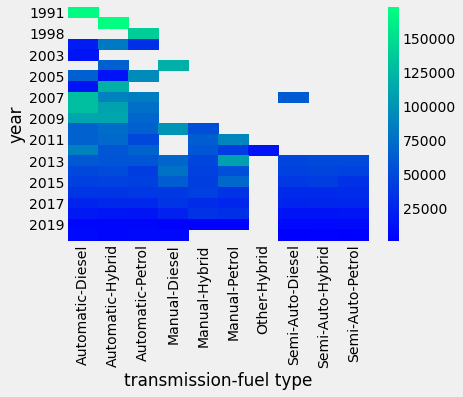

In [85]:
sns.heatmap(pivot_mileage,cmap='winter')

<AxesSubplot:xlabel='transmission-fuel type', ylabel='year'>

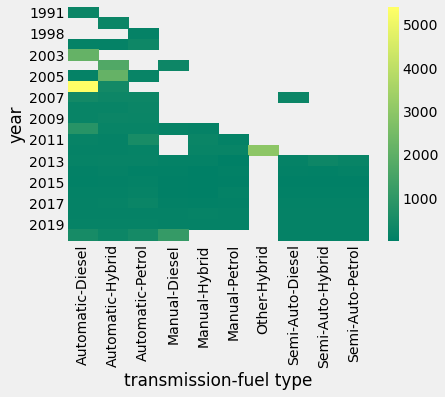

In [86]:
sns.heatmap(pivot_engine,cmap='summer')

<AxesSubplot:xlabel='transmission', ylabel='price'>

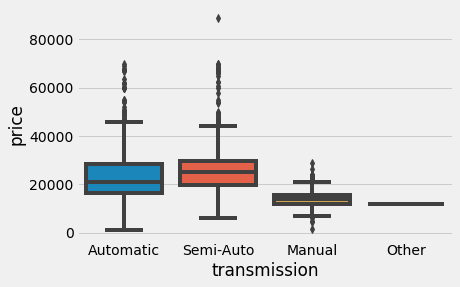

In [87]:
sns.boxplot(x='transmission',
            y='price',
            data=car)

<AxesSubplot:xlabel='year', ylabel='price'>

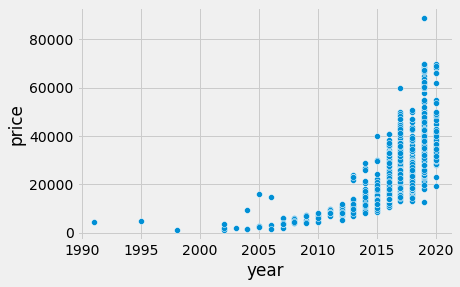

In [88]:
sns.scatterplot(x='year',
            y='price',
            data=car)

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

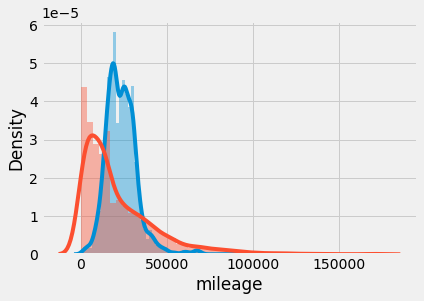

In [89]:
sns.distplot(car['price'])
sns.distplot(car['mileage'])

In [90]:
car.head()

,index,year,price,transmission,mileage,fuel type,engine size,reference
0,0,2020,30495.0,Automatic,14137.0,Hybrid,2.0,25017331
1,1,2020,29989.0,Automatic,14137.0,Petrol,15.0,25043746
2,2,2020,37899.0,Automatic,14137.0,Diesel,2.0,25142894
3,3,2019,30399.0,Automatic,14137.0,Hybrid,2.0,24942816
4,4,2019,29899.0,Automatic,14137.0,Diesel,2.0,24913660


# Encoding

In [91]:
x_corr=car.corr()

<AxesSubplot:>

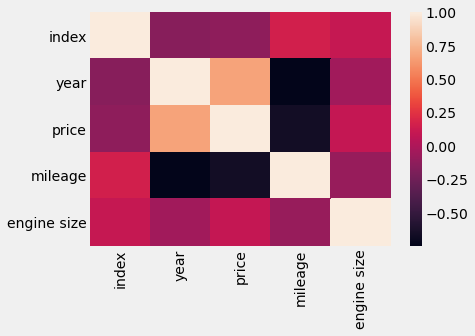

In [92]:
sns.heatmap(x_corr)

## working on 'transmission' column -> OneHotEncoding

In [93]:
car3=car.copy()

In [94]:
one_hot_enc=preprocessing.OneHotEncoder(sparse=False)

In [95]:
data=one_hot_enc.fit_transform(car3[['transmission']])
data

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [96]:
l=one_hot_enc.categories_[0]
l

array(['Automatic', 'Manual', 'Other', 'Semi-Auto'], dtype=object)

In [97]:
new_car3=pd.DataFrame(data,columns=l)
new_car3

,Automatic,Manual,Other,Semi-Auto
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
3899,0.0,1.0,0.0,0.0
3900,1.0,0.0,0.0,0.0
3901,0.0,1.0,0.0,0.0
3902,1.0,0.0,0.0,0.0


In [98]:
new_car3=pd.concat([car3,new_car3],axis=1).drop(columns=['transmission'])
new_car3

,index,year,price,mileage,fuel type,engine size,reference,Automatic,Manual,Other,Semi-Auto
0,0,2020,30495.0,14137.0,Hybrid,2.0,25017331,1.0,0.0,0.0,0.0
1,1,2020,29989.0,14137.0,Petrol,15.0,25043746,1.0,0.0,0.0,0.0
2,2,2020,37899.0,14137.0,Diesel,2.0,25142894,1.0,0.0,0.0,0.0
3,3,2019,30399.0,14137.0,Hybrid,2.0,24942816,1.0,0.0,0.0,0.0
4,4,2019,29899.0,14137.0,Diesel,2.0,24913660,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3899,4001,2017,14700.0,31357.0,Diesel,150.0,25451436,0.0,1.0,0.0,0.0
3900,4002,2018,18500.0,28248.0,Hybrid,150.0,25451481,1.0,0.0,0.0,0.0
3901,4003,2014,11900.0,48055.0,Petrol,20.0,25057204,0.0,1.0,0.0,0.0
3902,4004,2014,11300.0,49865.0,Diesel,145.0,25144481,1.0,0.0,0.0,0.0


## working on 'fuel type' column -> LabelBinarizer

In [99]:
lab_bin=preprocessing.LabelBinarizer()

In [100]:
data2=lab_bin.fit_transform(new_car3['fuel type'])
data2

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [101]:
l2=lab_bin.classes_
l2

array(['Diesel', 'Hybrid', 'Petrol'], dtype='<U6')

In [102]:
car4=pd.DataFrame(data=data2,columns=l2)
car4

,Diesel,Hybrid,Petrol
0,0,1,0
1,0,0,1
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
3899,1,0,0
3900,0,1,0
3901,0,0,1
3902,1,0,0


In [103]:
new_car4=pd.concat([new_car3,car4],axis=1).drop(columns=['fuel type'])
new_car4

,index,year,price,mileage,engine size,reference,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,Petrol
0,0,2020,30495.0,14137.0,2.0,25017331,1.0,0.0,0.0,0.0,0,1,0
1,1,2020,29989.0,14137.0,15.0,25043746,1.0,0.0,0.0,0.0,0,0,1
2,2,2020,37899.0,14137.0,2.0,25142894,1.0,0.0,0.0,0.0,1,0,0
3,3,2019,30399.0,14137.0,2.0,24942816,1.0,0.0,0.0,0.0,0,1,0
4,4,2019,29899.0,14137.0,2.0,24913660,1.0,0.0,0.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,4001,2017,14700.0,31357.0,150.0,25451436,0.0,1.0,0.0,0.0,1,0,0
3900,4002,2018,18500.0,28248.0,150.0,25451481,1.0,0.0,0.0,0.0,0,1,0
3901,4003,2014,11900.0,48055.0,20.0,25057204,0.0,1.0,0.0,0.0,0,0,1
3902,4004,2014,11300.0,49865.0,145.0,25144481,1.0,0.0,0.0,0.0,1,0,0


#### Lets check for heat  map after encodings

In [104]:
x2_corr=new_car4.corr()
x2_corr

,index,year,price,mileage,engine size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,Petrol
index,1.000000,-0.148851,-0.123898,0.156890,0.101418,0.387301,0.051522,0.026562,-0.406364,-0.017918,0.022761,-0.004836
year,-0.148851,1.000000,0.674993,-0.746495,-0.049220,-0.200864,-0.164637,-0.038627,0.272328,0.009574,0.010781,-0.020224
price,-0.123898,0.674993,1.000000,-0.660028,0.096863,-0.096627,-0.240773,-0.020874,0.202285,0.016356,-0.001126,-0.015122
mileage,0.156890,-0.746495,-0.660028,1.000000,-0.088106,0.163590,0.224042,-0.005583,-0.260249,-0.007417,-0.009218,0.016529
engine size,0.101418,-0.049220,0.096863,-0.088106,1.000000,0.085350,-0.049159,0.196660,-0.069001,0.000147,-0.016523,0.016280
Automatic,0.387301,-0.200864,-0.096627,0.163590,0.085350,1.000000,-0.196525,-0.013573,-0.901350,-0.018047,0.005685,0.012269
Manual,0.051522,-0.164637,-0.240773,0.224042,-0.049159,-0.196525,1.000000,-0.003710,-0.246344,-0.008925,0.002701,0.006178
Other,0.026562,-0.038627,-0.020874,-0.005583,0.196660,-0.013573,-0.003710,1.000000,-0.017014,-0.011225,0.022746,-0.011467
Semi-Auto,-0.406364,0.272328,0.202285,-0.260249,-0.069001,-0.901350,-0.246344,-0.017014,1.000000,0.022131,-0.007538,-0.014481
Diesel,-0.017918,0.009574,0.016356,-0.007417,0.000147,-0.018047,-0.008925,-0.011225,0.022131,1.000000,-0.493496,-0.502368


<AxesSubplot:>

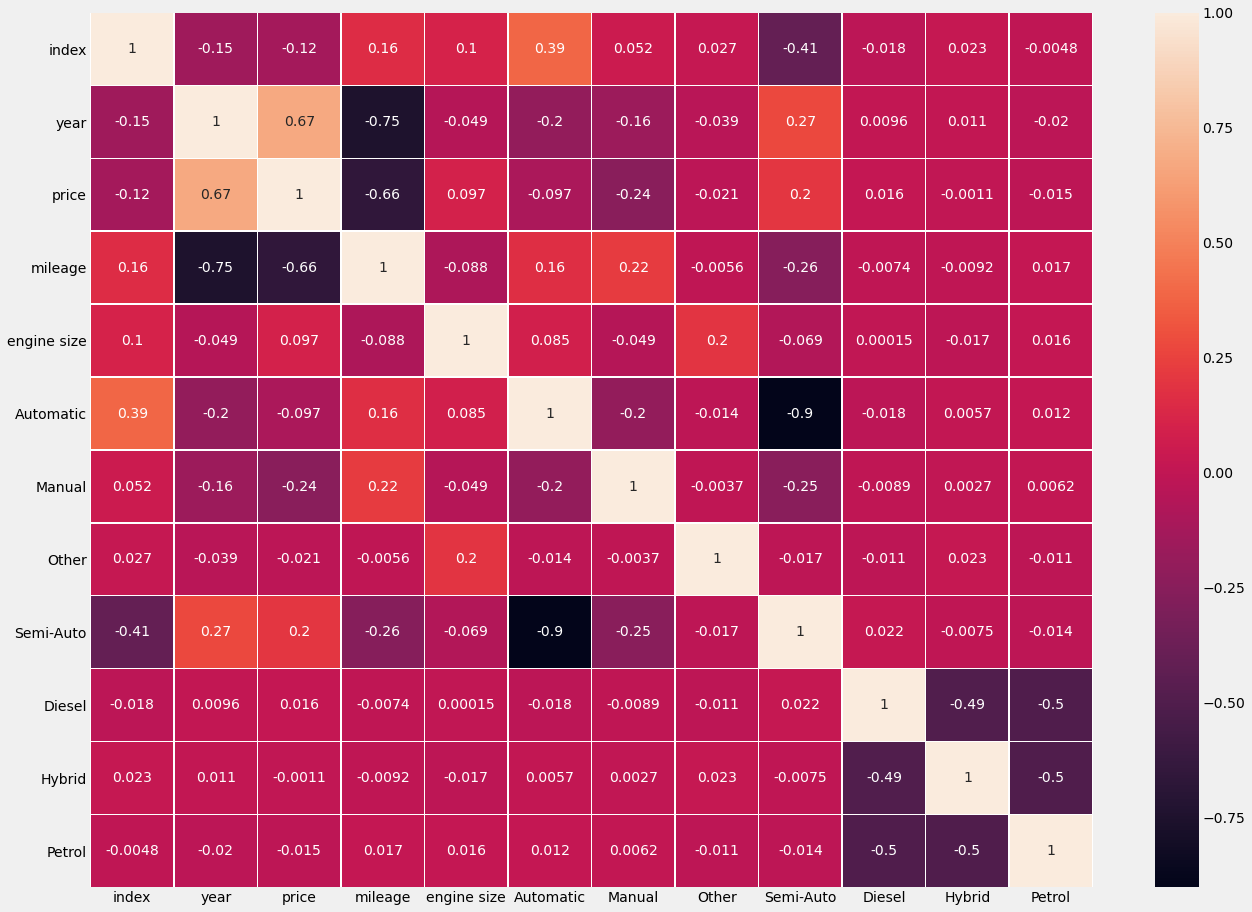

In [105]:
plt.figure(figsize=(20,15))
sns.heatmap(x2_corr,annot=True,linewidths=0.5)

# Feature Selection

### by heatmap corr

In [106]:
def f1(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [107]:
f1(x2_corr,0.5)

{'Petrol', 'Semi-Auto', 'mileage', 'price'}

### PCA

In [108]:
pca=decomposition.PCA(n_components=5)

In [109]:
pca.fit(new_car4)

PCA(n_components=5)

In [110]:
pd.DataFrame(pca.transform(new_car4))

,0,1,2,3,4
0,210929.285385,-10625.731251,4405.761183,2033.233977,-151.421654
1,184515.637457,-10329.567296,3916.315193,2025.509770,-133.986365
2,85355.447081,-11943.791298,11501.860433,1959.654320,-150.279962
3,285443.158035,-11037.855702,4323.134186,2054.878032,-160.934514
4,314599.530385,-11070.603484,3846.587563,2065.439712,-163.711188
...,...,...,...,...,...
3899,-223042.129435,12888.691285,-6046.121248,-1941.681781,29.166021
3900,-223111.283631,8846.563257,-3259.912779,-1977.182094,18.747384
3901,171281.747727,27384.878401,-4044.497953,-1700.971555,-131.950472
3902,84017.510005,29804.070200,-4128.851820,-1719.189468,7.093655


In [111]:
x=[]
y1=[]
y2=[]
for i in range(1,new_car4.shape[1]+1):
    pca_temp=decomposition.PCA(n_components=i)
    pca_temp.fit(new_car4)
    x.append(i+1)
    y1.append(pca_temp.noise_variance_)
    y2.append(pca_temp.score(new_car4))

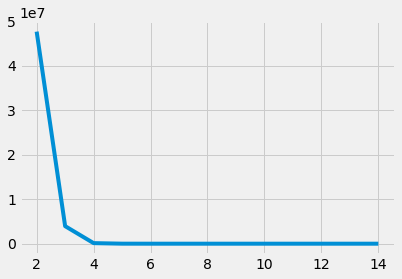

In [112]:
plt.plot(x,y1)
#plt.plot(x,y2)
plt.show()

### by wrapping method Exhaustive Feature Selector

In [113]:
iris=datasets.load_iris()

In [114]:
x=iris['data']
y=iris['target']

In [115]:
pd.DataFrame(data=iris.data,columns=['sl','sw','pl','pw'])

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [116]:
efs=EFS(estimator=ensemble.RandomForestClassifier(n_jobs=-1),min_features=1,max_features=3)

In [117]:
efs.fit(x,y)

Features: 14/14

ExhaustiveFeatureSelector(estimator=RandomForestClassifier(n_jobs=-1),
                          max_features=3)

In [118]:
efs.best_feature_names_

('2', '3')

In [119]:
efs.best_score_

0.9666666666666668

In [128]:
a = np.array([3,8,9])
a

array([3, 8, 9])

In [124]:
z_score_norm(a)

array([ 1.41421356, -0.70714215, -0.70707142])

In [129]:
dec_scal_norm(a)

array([0.3, 0.8, 0.9])